# Hierarchical clustering 

To perform hierarchical clustering on your dataset, we'll go through the process step by step. After each major step, I'll pause for your confirmation to continue. Here are the general steps we'll follow:

Data Loading and Preprocessing: We'll start by loading your dataset and performing any necessary preprocessing like handling missing values, encoding categorical variables, and normalizing the data.
Exploratory Data Analysis (EDA): We'll take a look at the basic statistics of your data to understand its structure and distribution.
Hierarchical Clustering: We'll apply hierarchical clustering to your data.
Analysis of Clustering Results: We'll analyze the clustering results, including visualizing the dendrogram and interpreting the clusters.

In [2]:
import pandas as pd

# Load the dataset
file_path = '/Users/aviajmera/Downloads/Clustering/Hierarchical/userbehaviour.csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset
data_info = data.info()
data_head = data.head()

data_info, data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   userid                      999 non-null    int64  
 1   Average Screen Time         999 non-null    float64
 2   Average Spent on App (INR)  999 non-null    float64
 3   Left Review                 999 non-null    int64  
 4   Ratings                     999 non-null    int64  
 5   New Password Request        999 non-null    int64  
 6   Last Visited Minutes        999 non-null    int64  
 7   Status                      999 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 62.6+ KB


(None,
    userid  Average Screen Time  Average Spent on App (INR)  Left Review  \
 0    1001                 17.0                       634.0            1   
 1    1002                  0.0                        54.0            0   
 2    1003                 37.0                       207.0            0   
 3    1004                 32.0                       445.0            1   
 4    1005                 45.0                       427.0            1   
 
    Ratings  New Password Request  Last Visited Minutes       Status  
 0        9                     7                  2990    Installed  
 1        4                     8                 24008  Uninstalled  
 2        8                     5                   971    Installed  
 3        6                     2                   799    Installed  
 4        5                     6                  3668    Installed  )

(<seaborn.axisgrid.PairGrid at 0x1318a2990>, <Axes: >)

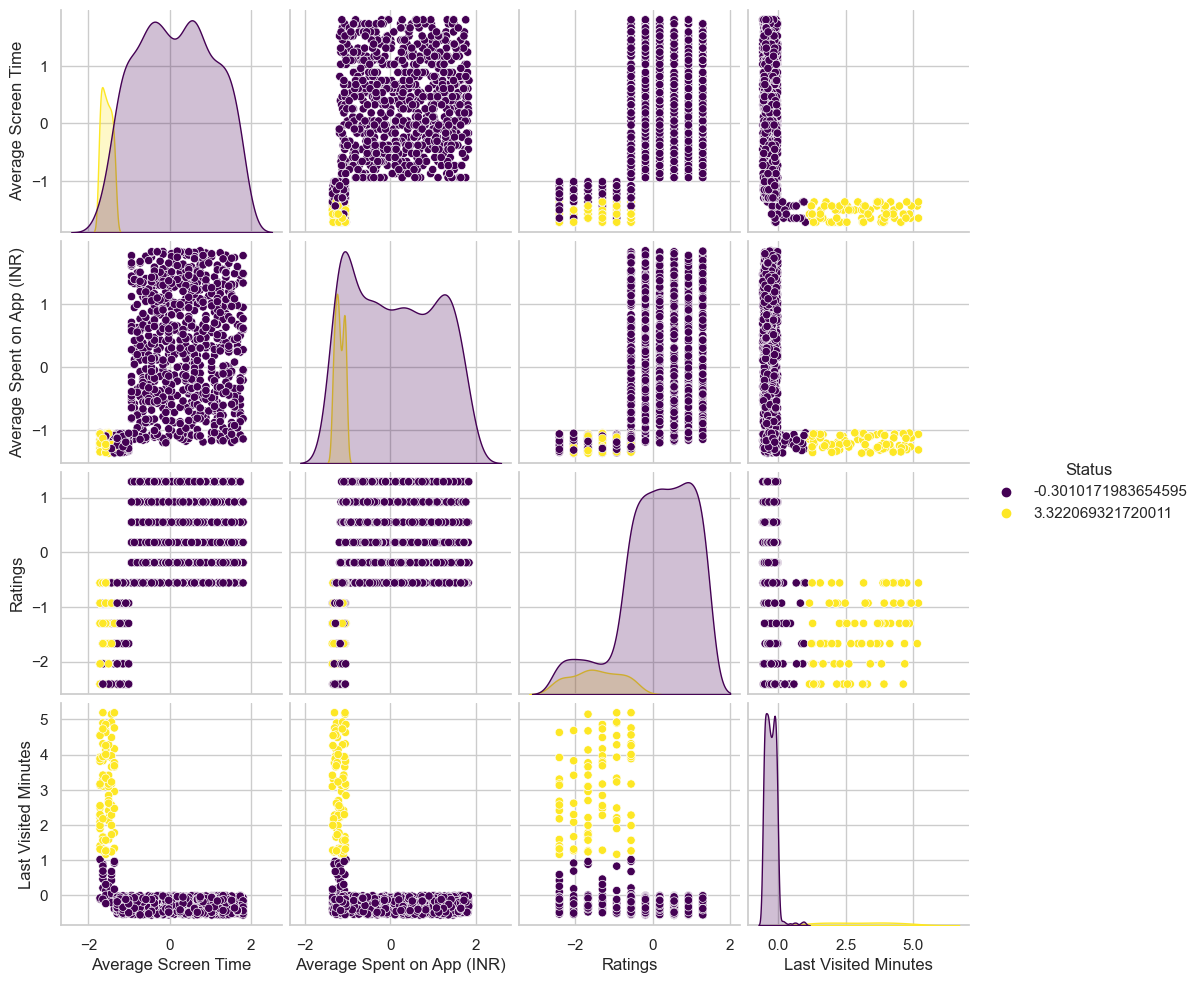

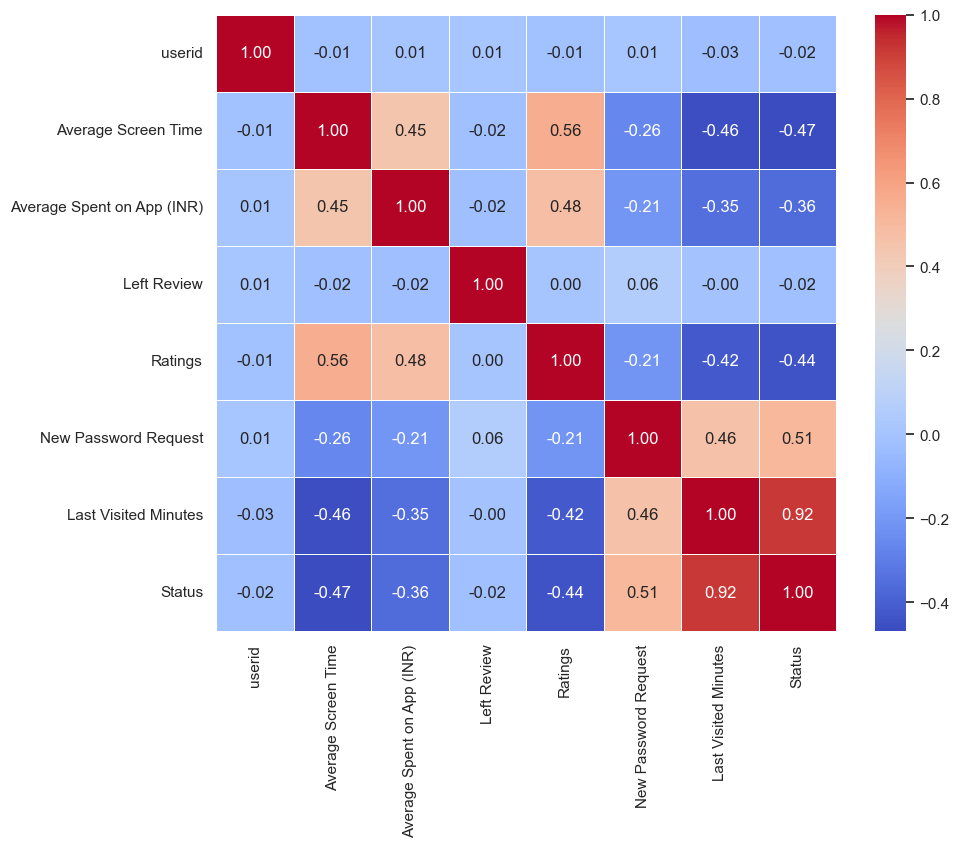

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Exploratory Data Analysis (EDA)
# Generating a pair plot for a subset of columns to visualize relationships and distributions
subset_columns = ['Average Screen Time', 'Average Spent on App (INR)', 'Ratings', 'Last Visited Minutes', 'Status']
pairplot = sns.pairplot(data[subset_columns], diag_kind="kde", hue="Status", palette="viridis")

# Generating a correlation heatmap
plt.figure(figsize=(10, 8))
correlation = data.corr()
heatmap = sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

pairplot, heatmap



The Exploratory Data Analysis (EDA) has provided some insights:

Pair Plot: This plot shows the relationships and distributions of a subset of variables (Average Screen Time, Average Spent on App (INR), Ratings, Last Visited Minutes). The hue is based on the Status column. This visualization helps in understanding how different features interact with each other and their distribution across different status categories.

Correlation Heatmap: It shows the correlation between different features. Values close to 1 or -1 indicate a strong positive or negative correlation, respectively, while values around 0 imply a weak or no linear relationship. This helps in understanding the interdependencies between different variables.

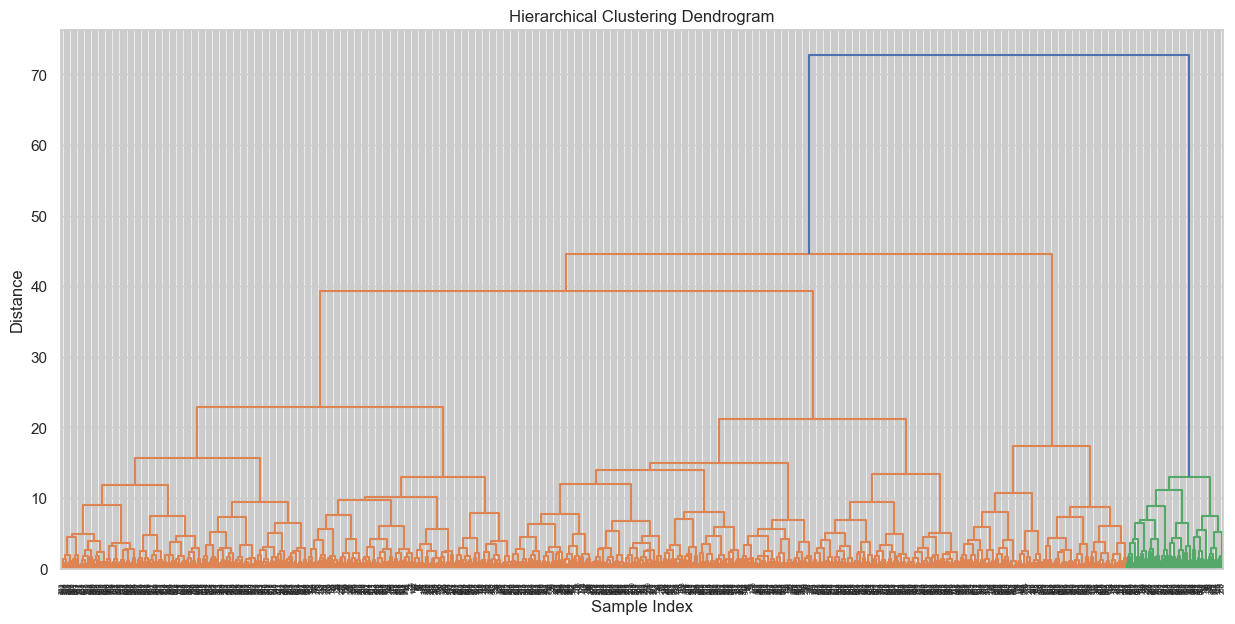

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [10.0, 10.0, 25.0, 25.0],
  [35.0, 35.0, 45.0, 45.0],
  [40.0, 40.0, 55.0, 55.0],
  [17.5, 17.5, 47.5, 47.5],
  [65.0, 65.0, 75.0, 75.0],
  [70.0, 70.0, 85.0, 85.0],
  [32.5, 32.5, 77.5, 77.5],
  [95.0, 95.0, 105.0, 105.0],
  [100.0, 100.0, 115.0, 115.0],
  [125.0, 125.0, 135.0, 135.0],
  [107.5, 107.5, 130.0, 130.0],
  [145.0, 145.0, 155.0, 155.0],
  [118.75, 118.75, 150.0, 150.0],
  [55.0, 55.0, 134.375, 134.375],
  [165.0, 165.0, 175.0, 175.0],
  [185.0, 185.0, 195.0, 195.0],
  [170.0, 170.0, 190.0, 190.0],
  [205.0, 205.0, 215.0, 215.0],
  [180.0, 180.0, 210.0, 210.0],
  [225.0, 225.0, 235.0, 235.0],
  [195.0, 195.0, 230.0, 230.0],
  [245.0, 245.0, 255.0, 255.0],
  [265.0, 265.0, 275.0, 275.0],
  [250.0, 250.0, 270.0, 270.0],
  [212.5, 212.5, 260.0, 260.0],
  [285.0, 285.0, 295.0, 295.0],
  [305.0, 305.0, 315.0, 315.0],
  [290.0, 290.0, 310.0, 310.0],
  [300.0, 300.0, 325.0, 325.0],
  [335.0, 335.0, 345.0, 345.0],
  [355.0, 355.0, 365.0, 365.0]

In [6]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Applying Hierarchical Clustering
# Choosing the linkage method and metric
linked = linkage(data, method='ward', metric='euclidean')

# Plotting the dendrogram
plt.figure(figsize=(15, 7))
dendrogram_plot = dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

dendrogram_plot



Interpreting the Dendrogram:
Cluster Formation: You can observe how individual data points are grouped into clusters and how these clusters are further merged at various levels of similarity.
Deciding the Number of Clusters: To determine the number of clusters, you would typically look for the longest vertical lines that are not crossed by any extended horizontal lines and then draw a horizontal line through them. The number of vertical lines this horizontal line crosses is the suggested number of clusters.

In [7]:
from scipy.cluster.hierarchy import fcluster

# Determining the optimal number of clusters
# This is often a subjective decision, we'll use a common method to cut the dendrogram
# Here, we choose a maximum distance to cut the dendrogram to form clusters
# Typically, this distance is chosen by looking for the largest distance that doesn't cross any horizontal lines

# For this example, we'll set a distance threshold
distance_threshold = 150
clusters = fcluster(linked, distance_threshold, criterion='distance')

# Adding the cluster labels to the original data
data['Cluster'] = clusters

# Displaying the first few rows with the cluster assignments
clustered_data_head = data.head()
cluster_count = data['Cluster'].value_counts()

clustered_data_head, cluster_count


(     userid  Average Screen Time  Average Spent on App (INR)  Left Review  \
 0 -1.730318            -0.519415                    0.671295     1.005018   
 1 -1.726850            -1.714218                   -1.186433    -0.995007   
 2 -1.723383             0.886235                   -0.696377    -0.995007   
 3 -1.719915             0.534823                    0.065932     1.005018   
 4 -1.716448             1.448495                    0.008278     1.005018   
 
     Ratings  New Password Request  Last Visited Minutes    Status  Cluster  
 0  0.920867              0.739449             -0.246968 -0.301017        1  
 1 -0.930876              1.098744              2.200476  3.322069        1  
 2  0.550518              0.020860             -0.482071 -0.301017        1  
 3 -0.190179             -1.057024             -0.502100 -0.301017        1  
 4 -0.560528              0.380154             -0.168019 -0.301017        1  ,
 1    999
 Name: Cluster, dtype: int64)